In [76]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from rdkit import rdBase
import pubchempy as pcp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
drugs = pd.read_csv('CID_properties_nr.csv')
pt.AddMoleculeColumnToFrame(frame=drugs,smilesCol='IsomericSMILES', molCol='Molecule')
drugs.head()

[17:50:27] WARNING: not removing hydrogen atom without neighbors


,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,Molecule
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,<rdkit.Chem.rdchem.Mol object at 0x0000029A5DB...
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,<rdkit.Chem.rdchem.Mol object at 0x0000029A702...
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000029A702...
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,<rdkit.Chem.rdchem.Mol object at 0x0000029A702...
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,<rdkit.Chem.rdchem.Mol object at 0x0000029A702...


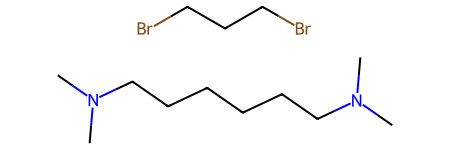

In [27]:
first_mol = drugs.iloc[0]['Molecule']
first_mol

In [21]:
from rdkit.Chem.rdMolDescriptors import (GetMorganFingerprint,
                                         GetAtomPairFingerprint,
                                         GetTopologicalTorsionFingerprint,
                                         GetMACCSKeysFingerprint,
                                         GetFeatureInvariants,
                                         GetConnectivityInvariants)

In [48]:
""" GetAtomPairFingerprint,
GetTopologicalTorsionFingerprint,
GetFeatureInvariants,
GetConnectivityInvariants
pubchem_fingerprints,
cactvs_fingerprints """

'                                          GetAtomPairFingerprint,\n                                         GetTopologicalTorsionFingerprint,\n                                         GetMACCSKeysFingerprint,\n                                         GetFeatureInvariants,\n                                         GetConnectivityInvariants '

In [47]:
def compute_morgan_fp(mol, depth=2, nBits=2048):
    a = np.zeros(nBits)
    try:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol,depth,nBits), a)
    except:
        return None
    return a

In [74]:
def compute_maccskeys(mol):
    try:
        mkeys = MACCSkeys.GenMACCSKeys(mol)   
    except:
        return None
    return np.array(mkeys)

In [85]:
def compute_atom_pair_fp(mol):
    try:
        atom_pair_fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(first_mol, nBits = 512)
    except:
        return None
    return np.array(atom_pair_fp)

In [59]:
#celda probar funciones
compute_maccskeys(first_mol)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [66]:
drug_ids = drugs[['CID','Molecule','drug_class']]
drug_ids.head()

,CID,Molecule,drug_class
0,24769,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,hematologic
1,134694070,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,cardio
2,5121,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,antiinfective
3,4660557,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,cns
4,122175,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,antineoplastic


In [84]:
drug_ids['Morgan2FP'] = drug_ids['Molecule'].map(compute_morgan_fp)
drug_ids['MACCSKeys'] = drug_ids['Molecule'].map(compute_maccskeys)


In [86]:
drug_ids['AtomPairFP'] = drug_ids['Molecule'].map(compute_atom_pair_fp)

In [87]:
drug_ids.head()

,CID,Molecule,drug_class,Morgan2FP,MACCSKeys,AtomPairFP
0,24769,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,hematologic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,134694070,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,cardio,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,5121,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,antiinfective,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4660557,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,cns,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,122175,<rdkit.Chem.rdchem.Mol object at 0x0000029A498...,antineoplastic,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [88]:
drug_ids.to_pickle('morgan_and_mac.pkl')